## Assignment 1

## Exploratory Data Analysis 


## PGCP DSML IITR-TimesPro


### Submitted by - Sylvia Chadha

### Problem Statement

Using the waiter’s tip data set, perform the following analysis to understand what how tips to waiter is influenced by various parameters 



### Dataset Description 

Filename: tips.csv 

Description for individual columns are listed below 

- total_bill: bill in dollars 

- tip: tip in dollars 

- sex: gender of the bill payer 

- smoker: whether there were smokers in the party 

- day: day of the week 

- time: time of day 

- size: size of the party 

### Import libraries, Load dataset, Basic info for dataset.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/sylvia/Desktop/datasets/tips.csv')
print(data.shape)
data.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
data.describe(include='object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Identify kpi - tips and remove outliers from kpi

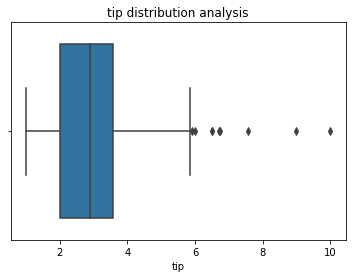

In [6]:
sns.boxplot(x=data['tip'])
plt.title('tip distribution analysis')
plt.show();

In [7]:
q1 = data['tip'].quantile(0.25)
q3 = data['tip'].quantile(0.75)
iqr = q3 - q1
uw = q3 + 1.5 * iqr

uw

5.90625

In [8]:
outl = data[data['tip'] > uw]
print('Number of tips greater than upper whisker =', len(outl),'tips')

Number of tips greater than upper whisker = 9 tips


In [9]:
outl

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [10]:
# % of outliers

print('% of outliers',(len(outl)/len(data)*100))

% of outliers 3.6885245901639343


In [11]:
data.drop(data[data['tip'] > uw].index, inplace = True)

print('Num of records after removing outliers', len(data))

Num of records after removing outliers 235


### Question 1

Calculate average tip by the following groups and visualize the same using bar charts (use subplots) 
- Gender,  
- Size of the party 
- Smoker vs Non-Smoker 
- Day of the week 

### Groupby kpi w.r.t categorical variables

In [12]:
d_gender = data.groupby('sex')['tip'].mean()
d_gender

sex
Female    2.790814
Male      2.863356
Name: tip, dtype: float64

In [13]:
d_size = data.groupby('size')['tip'].mean()
d_size

size
1    1.437500
2    2.582308
3    3.043429
4    3.662500
5    4.028000
6    4.733333
Name: tip, dtype: float64

In [14]:
d_smoker = data.groupby('smoker')['tip'].mean()
d_smoker

smoker
No     2.826483
Yes    2.853444
Name: tip, dtype: float64

In [15]:
d_day = data.groupby('day')['tip'].mean()
d_day

day
Fri     2.734737
Sat     2.650247
Sun     3.174189
Thur    2.707049
Name: tip, dtype: float64

### Visualize kpi w.r.t categorical variables

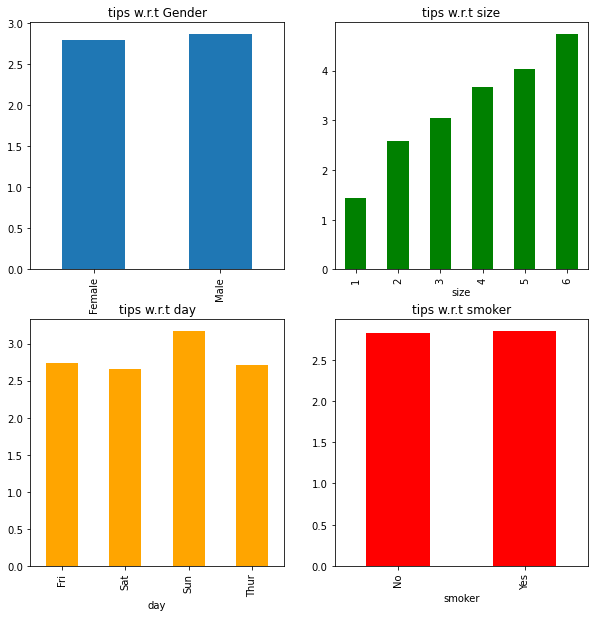

In [16]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10)) # to refer to each, use indexing

d_gender.plot(kind='bar', ax=ax[0,0],title='tips w.r.t Gender')
d_size.plot(kind='bar', ax=ax[0,1],title='tips w.r.t size',color='green')
d_day.plot(kind='bar', ax=ax[1,0],title='tips w.r.t day', color='orange');
d_smoker.plot(kind='bar', ax=ax[1,1],title='tips w.r.t smoker', color='red');


**Analysis**

- We see that tip amount increases w.r.t size.
- Sunday is when highest tip is given compared to other days.
- Tips do not seem to differ w.r.t Gender and Smoker columns.

### Question 2

Create box plot for tip amount column. Split the box plot by above mentioned categories (use subplots).


### Solution 2

### Boxplot for tip amount column

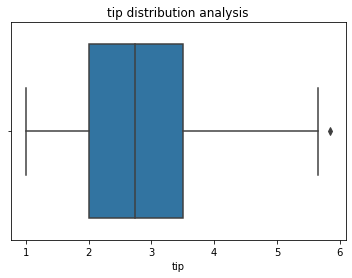

In [17]:
sns.boxplot(x=data['tip'])
plt.title('tip distribution analysis')
plt.show();

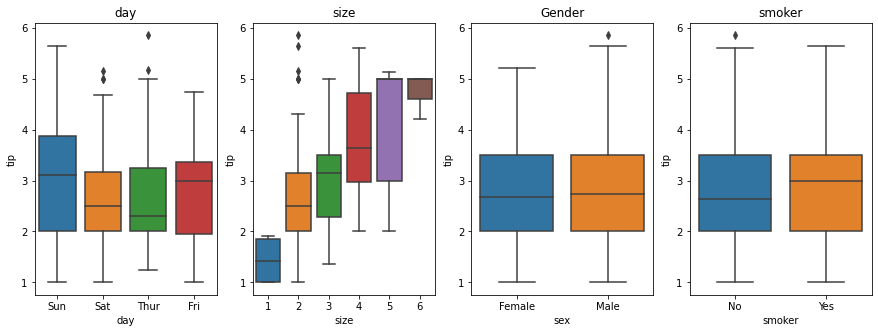

In [18]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15,5)) # to refer to each, use indexing

sns.boxplot(data=data, x='day', y='tip', ax=ax[0]).set(title='day')
sns.boxplot(data=data, x='size', y='tip', ax=ax[1]).set(title='size')
sns.boxplot(data=data, x='sex', y='tip', ax=ax[2]).set(title='Gender')
sns.boxplot(data=data, x='smoker', y='tip', ax=ax[3]).set(title='smoker')

plt.show()

### Question 3

Using the above bar charts & box plots, identify which group influences the tip amount the most 

### Solution 3

**Most important factor which influences top the most is the size of party**
- Based on above bar chart and boxplot we observe that size of the party influences tip the most.
- Below is barchart which shows as size increases, tip also increase.
- BAsed on boxplots we can see the IQR is very different for each size and overall tip range seems to increase w.r.t size.

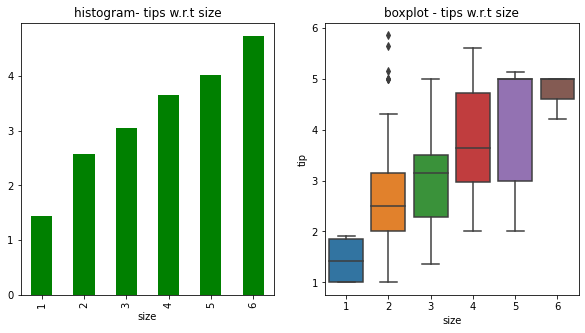

In [19]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

d_size.plot(kind='bar', ax=ax[0],title='histogram- tips w.r.t size',color='green')
sns.boxplot(data=data, x='size', y='tip', ax=ax[1]).set(title='boxplot - tips w.r.t size');


### Question 4

Visualize the relationship between total bill amount vs tip amount using scatter plot. The metric of interest should always be in the Y-axis. Here we are interested in understanding the tip pattern. Hence Y-axis should be tip amount and X axis should be total bill 

### Solution 4

### Scatter Plot

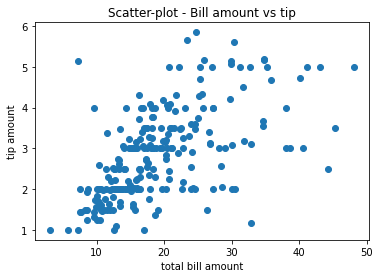

In [20]:
plt.scatter(x=data['total_bill'],y=data['tip'])
plt.xlabel('total bill amount')
plt.ylabel('tip amount')
plt.title('Scatter-plot - Bill amount vs tip');

### Question 5

Based on the above scatter plot, what do you think the waiter will do. Will he/she make you eat more or less to get good tip?  


### Solution 5

1. From scatter plot we see in general as bill amount increases, tip also increases. 
2. However towards higher bill amounts data is much more scattered. Inspite of higher bills, sometimes tip amount might be same as compared to lower bill amount so the two variables look moderately correlated.

### Question 6

Substantiate your above inference through appropriate statistical test 

### Solution 6

In [21]:
data.corr()

,total_bill,tip,size
total_bill,1.000000,0.595065,0.581462
tip,0.595065,1.000000,0.450306
size,0.581462,0.450306,1.000000


1. Correlation is a statistical measure that expresses the extent to which two variables are linearly related.
2. To check if predictor variable(total_bill) has a statistically significant relationship with an outcome variable(tip) we calculate the correlation coefficient.
3. We observe that correlation coefficient, r, is 0.595 which indicates that total_bill and tip are moderately correlated.

### Question 7
In the above scatter plot, color each circle by gender and list down your inferences 

### Solution 7

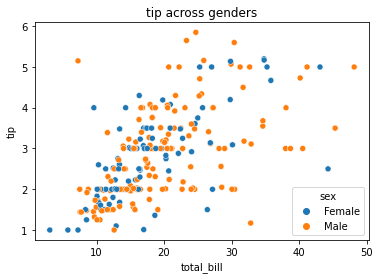

In [22]:
sns.scatterplot(data=data, x="total_bill", y="tip",hue='sex').set(title='tip across genders');



1. Based on above scatter plot, it seems gender is not a significant variable w.r.t tip given.
2. Tips do not vary w.r.t genders. There is no specific pattern.